In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

In [2]:
data = load_iris()
X = data.data
y = data.target

df = pd.DataFrame(X, columns=data.feature_names)
df['Species'] = y

In [3]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
df = df[df['Species'] != 0][['sepal width (cm)', 'petal length (cm)', 'Species']]

In [5]:
df

,sepal width (cm),petal length (cm),Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1
...,...,...,...
145,3.0,5.2,2
146,2.5,5.0,2
147,3.0,5.2,2
148,3.4,5.4,2


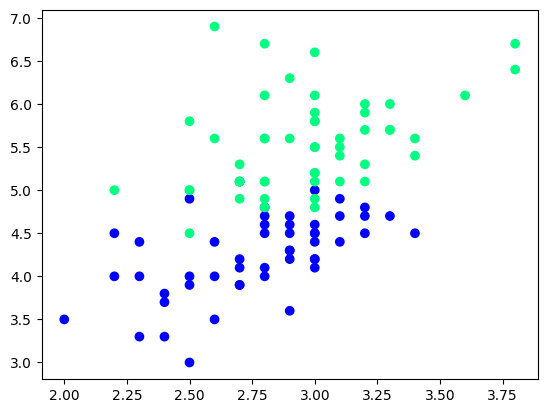

In [6]:
plt.scatter(df['sepal width (cm)'], df['petal length (cm)'], c=df['Species'], cmap='winter')

## Splitting Datasets

In [7]:
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [8]:
df_train

,sepal width (cm),petal length (cm),Species
72,2.5,4.9,1
149,3.0,5.1,2
56,3.3,4.7,1
142,2.7,5.1,2
119,2.2,5.0,2
117,3.8,6.7,2
57,2.4,3.3,1
74,2.9,4.3,1
92,2.6,4.0,1
124,3.3,5.7,2


In [9]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [10]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

# inituation

## Bagging

### Data from Tree-1

In [11]:
df_bag = df_train.sample(8, replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal width (cm),petal length (cm),Species
56,3.3,4.7,1
117,3.8,6.7,2
92,2.6,4.0,1
142,2.7,5.1,2
72,2.5,4.9,1
149,3.0,5.1,2
72,2.5,4.9,1
149,3.0,5.1,2


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions


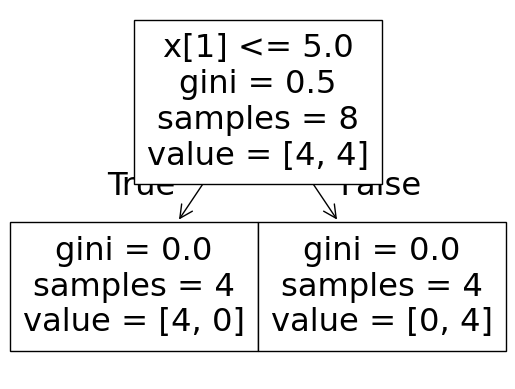

C:\Users\91991\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


C:\Users\91991\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


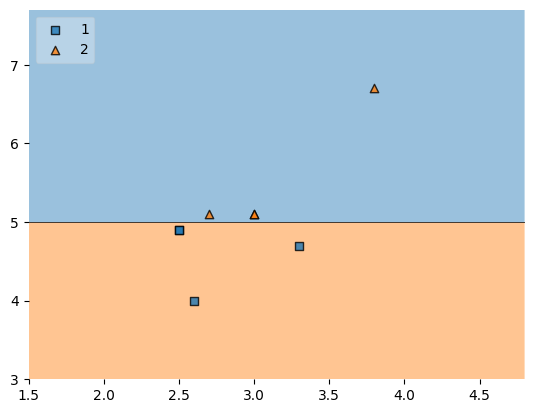

In [13]:
dt_bag1 = DecisionTreeClassifier()
evaluate(dt_bag1, X, y)

### Data from Tree-2

In [14]:
df_bag = df_train.sample(8, replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal width (cm),petal length (cm),Species
74,2.9,4.3,1
117,3.8,6.7,2
142,2.7,5.1,2
74,2.9,4.3,1
119,2.2,5.0,2
72,2.5,4.9,1
142,2.7,5.1,2
117,3.8,6.7,2


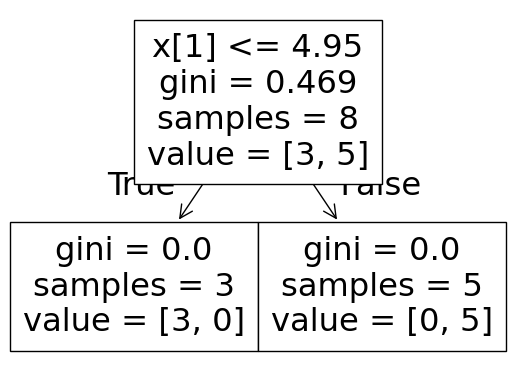

C:\Users\91991\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\91991\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


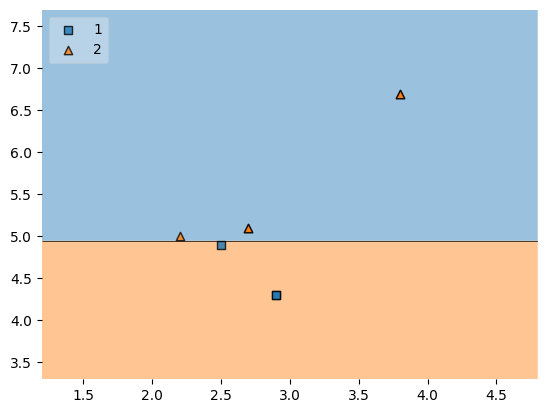

In [15]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2, X, y)

### Data from Tree-3

In [16]:
df_bag = df_train.sample(8, replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal width (cm),petal length (cm),Species
56,3.3,4.7,1
56,3.3,4.7,1
117,3.8,6.7,2
92,2.6,4.0,1
56,3.3,4.7,1
72,2.5,4.9,1
149,3.0,5.1,2
124,3.3,5.7,2


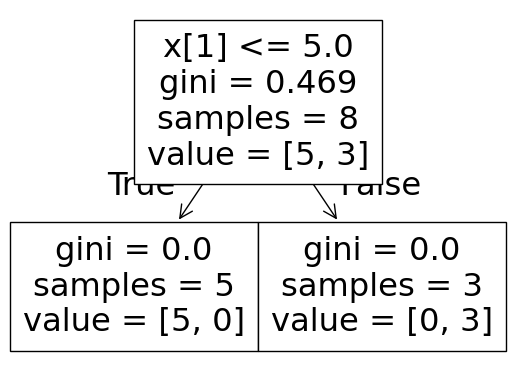

C:\Users\91991\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\91991\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


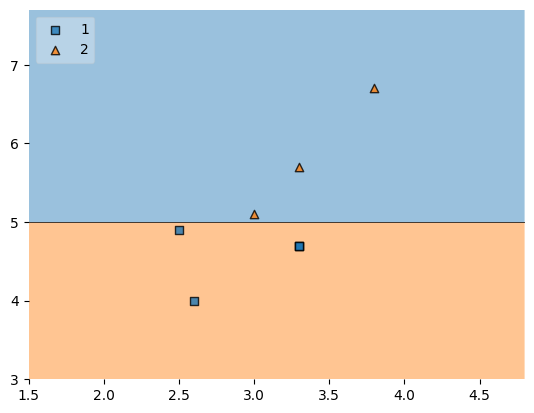

In [17]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3, X, y)

## Predict

In [18]:
df_test

,sepal width (cm),petal length (cm),Species
109,3.6,6.1,2
82,2.7,3.9,1
120,3.2,5.7,2
52,3.1,4.9,1
147,3.0,5.2,2


In [19]:
print("Predictor 1",dt_bag1.predict(np.array([3.3,5.7]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([3.3,5.7]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([3.3,5.7]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


C:\Users\91991\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\91991\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\91991\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Pasting

<p> Row sampling without replacement </p>

In [20]:
df_train

,sepal width (cm),petal length (cm),Species
72,2.5,4.9,1
149,3.0,5.1,2
56,3.3,4.7,1
142,2.7,5.1,2
119,2.2,5.0,2
117,3.8,6.7,2
57,2.4,3.3,1
74,2.9,4.3,1
92,2.6,4.0,1
124,3.3,5.7,2


In [21]:
df_train.sample(8)

,sepal width (cm),petal length (cm),Species
72,2.5,4.9,1
117,3.8,6.7,2
119,2.2,5.0,2
149,3.0,5.1,2
57,2.4,3.3,1
92,2.6,4.0,1
56,3.3,4.7,1
142,2.7,5.1,2


## Random Subspaces

<p>Column sampling</p>

In [22]:
data = load_iris()
X = data.data
y = data.target

df1 = pd.DataFrame(X, columns=data.feature_names)
df1['Species'] = y

In [23]:
df1.sample

<bound method NDFrame.sample of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8

In [24]:
df1.sample(2,replace=True,axis=1)

,petal length (cm),petal length (cm)
0,1.4,1.4
1,1.4,1.4
2,1.3,1.3
3,1.5,1.5
4,1.4,1.4
...,...,...
145,5.2,5.2
146,5.0,5.0
147,5.2,5.2
148,5.4,5.4


## Random Patches

<p> Row and column sampling both combined</p>

In [25]:
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [26]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,petal width (cm),petal width (cm)
100,2.5,2.5
90,1.2,1.2
142,1.9,1.9
144,2.5,2.5
28,0.2,0.2
103,1.8,1.8
140,2.4,2.4
132,2.2,2.2


# Classification

In [43]:
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [29]:
X, y = make_classification(n_samples=10000, n_features=10, n_informative=3)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [31]:
dt = DecisionTreeClassifier(random_state=10)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

accuracy_score(y_test, y_pred)

0.9655

## Bagging

In [33]:
bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=0.2, bootstrap=True, random_state=42)
bag.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.2,
                  n_estimators=500, random_state=42)

In [34]:
y_pred_bag = bag.predict(X_test)
accuracy_score(y_test, y_pred_bag)


0.9735

In [38]:
bag.estimators_samples_[0].shape

(1600,)

In [41]:
bag.estimators_features_[0].shape

(10,)

## Bagging using SVC

In [44]:
bag_svc = BaggingClassifier(SVC(), n_estimators=500, max_samples=0.2, bootstrap=True, random_state=42)
bag_svc.fit(X_train, y_train)

BaggingClassifier(estimator=SVC(), max_samples=0.2, n_estimators=500,
                  random_state=42)

In [46]:
y_pred_svc = bag.predict(X_test)
accuracy_score(y_test, y_pred_svc)

0.9735

## Pasting

In [50]:
bag_past = BaggingClassifier(DecisionTreeClassifier(), 
                        n_estimators=500, 
                        max_samples=0.2, 
                        bootstrap=False,
                        random_state=42,
                        verbose=1,
                        n_jobs=-1                           
                       )
bag_past.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:  2.2min remaining:  2.2min
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  2.3min finished


BaggingClassifier(bootstrap=False, estimator=DecisionTreeClassifier(),
                  max_samples=0.2, n_estimators=500, n_jobs=-1, random_state=42,
                  verbose=1)

In [51]:
y_pred_past = bag_past.predict(X_test)
accuracy_score(y_test, y_pred_past)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    1.3s remaining:    1.3s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    1.4s finished


0.9725

## Random Subspaces

In [58]:
bag_rs = BaggingClassifier(DecisionTreeClassifier(), 
                        n_estimators=500, 
                        max_samples=1.0, 
                        bootstrap=False,
                        random_state=42,
                        bootstrap_features=True,
                        max_features=0.5            
                       )
bag_rs.fit(X_train, y_train)

BaggingClassifier(bootstrap=False, bootstrap_features=True,
                  estimator=DecisionTreeClassifier(), max_features=0.5,
                  n_estimators=500, random_state=42)

In [59]:
y_pred_rs = bag_rs.predict(X_test)
accuracy_score(y_test, y_pred_rs)

0.966

In [60]:
bag_rs.estimators_samples_[0].shape

(8000,)

In [61]:
bag_rs.estimators_features_[0].shape

(5,)

## Random Patches

In [62]:
bag_rp = BaggingClassifier(DecisionTreeClassifier(), 
                        n_estimators=500, 
                        max_samples=0.25, 
                        bootstrap=True,
                        random_state=42,
                        bootstrap_features=True,
                        max_features=0.5            
                       )
bag_rp.fit(X_train, y_train)

BaggingClassifier(bootstrap_features=True, estimator=DecisionTreeClassifier(),
                  max_features=0.5, max_samples=0.25, n_estimators=500,
                  random_state=42)

In [63]:
y_pred_rp = bag_rp.predict(X_test)
accuracy_score(y_test, y_pred_rp)

0.962

## OOB (Out-Of-Bag) Score

In [64]:
bag_oob = BaggingClassifier(DecisionTreeClassifier(),
                        n_estimators=500, 
                        max_samples=0.2, 
                        bootstrap=True, 
                        random_state=42,
                        oob_score=True
                       )
bag_oob.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.2,
                  n_estimators=500, oob_score=True, random_state=42)

In [65]:
y_pred_oob = bag_oob.predict(X_test)
accuracy_score(y_test, y_pred_oob)

0.9735

In [67]:
bag_oob.oob_score_

0.96975

# Bagging Tips

* Bagging generally gives better results than Pasting
* Good results come around the 25% to 50% row sampling mark
* Random patches and subspaces should be used while dealing with high dimensional data
* To find the correct hyperparameter values we can do GridSearchCV/RandomSearchCV

## Applying GridSearchCV

In [68]:
from sklearn.model_selection import GridSearchCV